# Dataset: Iris

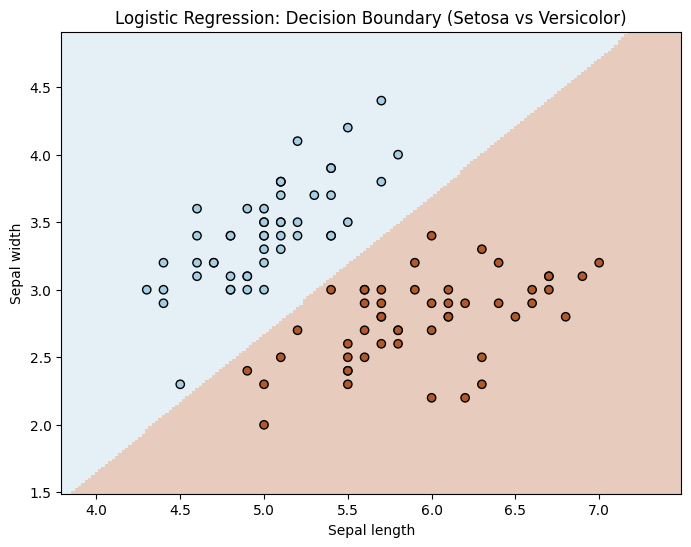

Model Coefficients: [[ 3.08267284 -3.01867739]]
Model Intercept: [-7.33819169]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 1. Load Data
iris = datasets.load_iris()
X = iris.data[:, :2]  # We only take the first two features (Sepal Length, Sepal Width) for 2D plotting
y = iris.target

# 2. Filter to Binary (0 vs 1)
# The dataset has 3 classes (0, 1, 2). We will remove class 2 (Virginica)
# to make this a clear binary classification problem for beginners.
mask = y != 2
X = X[mask]
y = y[mask]

# 3. Train the Model
clf = LogisticRegression(random_state=42)
clf.fit(X, y)

# 4. Visualization Logic
# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for every point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plotting
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto', alpha=0.3)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression: Decision Boundary (Setosa vs Versicolor)')
plt.show()

print("Model Coefficients:", clf.coef_)
print("Model Intercept:", clf.intercept_)

# Dataset: Titanic

Loading dataset...
Missing values before cleaning:
survived      0
pclass        0
sex           0
age         177
sibsp         0
fare          0
dtype: int64

Missing values after cleaning:
survived    0
pclass      0
sex         0
age         0
sibsp       0
fare        0
dtype: int64

--- Model Interpretation ---
  Feature  Coefficient
1     sex     2.568899
4    fare     0.002909
2     age    -0.030916
3   sibsp    -0.345801
0  pclass    -0.940880

Accuracy Score: 0.79

Generating Decision Boundary Plot (Age vs Fare)...


C:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


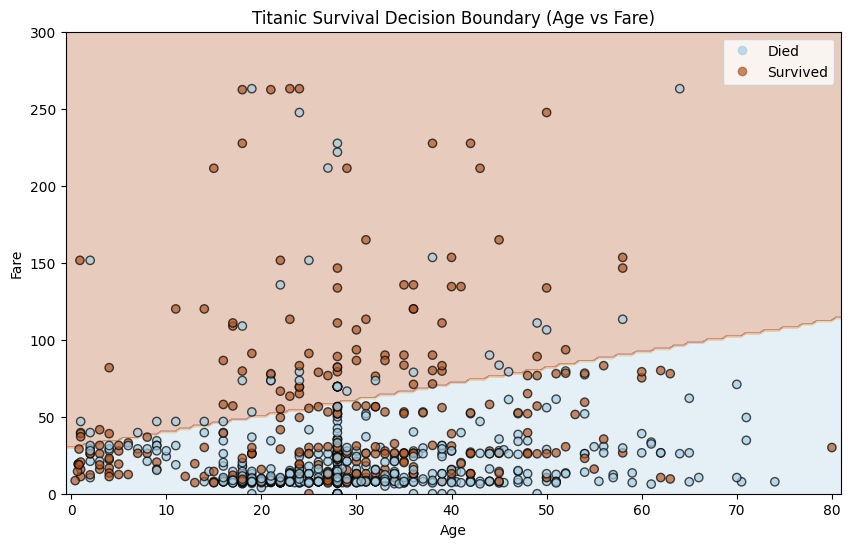

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Load Data (using seaborn's built-in dataset)
print("Loading dataset...")
df = sns.load_dataset('titanic')

# Select relevant features for the lesson
features = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'fare']
df = df[features]

# 2. Data Cleaning
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

# A. Handle Missing Age: Fill with median
df['age'] = df['age'].fillna(df['age'].median())

# B. Handle Missing Fare (rare, but good practice)
df['fare'] = df['fare'].fillna(df['fare'].median())

# C. Encode Categorical 'sex': 'male'/'female' -> 0/1
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

print(f"\nMissing values after cleaning:\n{df.isnull().sum()}")

# 3. Split Data
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Model (Full Model)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\n--- Model Interpretation ---")
print(coefficients)

# 6. Prediction
y_pred = model.predict(X_test)
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")

# 7. Visualization (2D Decision Boundary)
# NOTE: We retrain a simple model on just Age vs Fare to make plotting possible in 2D
print("\nGenerating Decision Boundary Plot (Age vs Fare)...")

# Select only two features for visualization
X_vis = df[['age', 'fare']]
y_vis = df['survived']

# Train a 2D model specifically for the graph
model_vis = LogisticRegression()
model_vis.fit(X_vis, y_vis)

# Create a mesh grid for plotting
x_min, x_max = X_vis['age'].min() - 1, X_vis['age'].max() + 1
y_min, y_max = X_vis['fare'].min() - 1, X_vis['fare'].max() + 1

# Step size for the mesh
h_age = 0.5 
h_fare = 2.0 

xx, yy = np.meshgrid(np.arange(x_min, x_max, h_age),
                     np.arange(y_min, y_max, h_fare))

# Predict on the mesh grid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
# Contour plot for the background colors
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Scatter plot for the actual data points
scatter = plt.scatter(X_vis['age'], X_vis['fare'], c=y_vis, edgecolors='k', cmap=plt.cm.Paired, alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Titanic Survival Decision Boundary (Age vs Fare)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Died', 'Survived'])

# Limit Y axis because some outlier fares are very high
plt.ylim(0, 300) 
plt.show()

# Dataset: Bank Marketing

Fetching Bank Marketing dataset (this may take a moment)...
Class Distribution (0=No, 1=Yes):
Class
0    39922
1     5289
Name: count, dtype: int64
Training full model...

--- Classification Report ---
              precision    recall  f1-score   support

  No Deposit       0.90      0.98      0.94     11966
     Deposit       0.58      0.17      0.27      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564

Displaying Confusion Matrix...


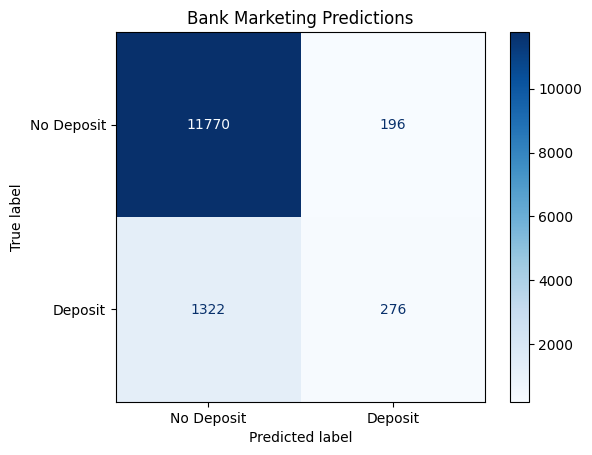


Generating Decision Boundary Plot (Age vs Call Duration)...


C:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


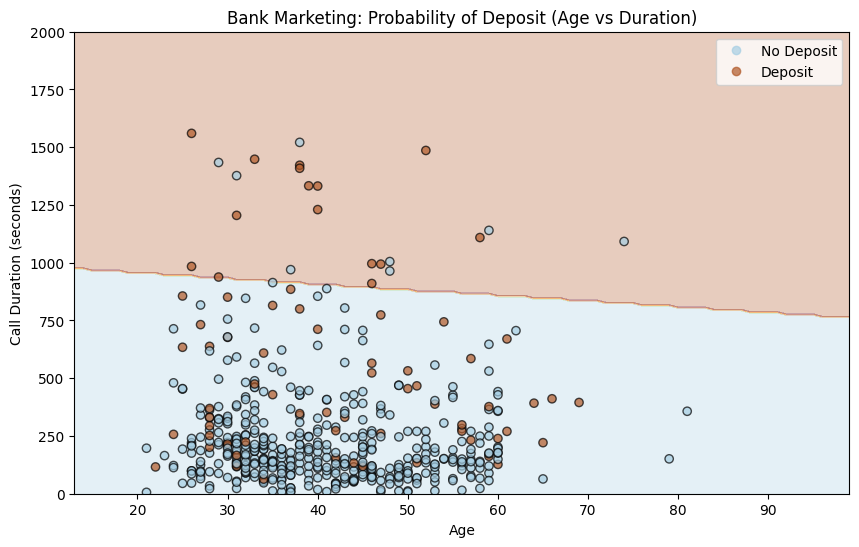

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Load Data (Real data from UCI repo via sklearn)
print("Fetching Bank Marketing dataset (this may take a moment)...")
data = fetch_openml(name='bank-marketing', version=1, as_frame=True)
X = data.data
y = data.target

# Simplify dataset for teaching:
# Use a subset of columns to keep it manageable
# V1 = age, V2 = job (categorical), V4 = education (cat), V12 = duration of call
subset_cols = ['V1', 'V2', 'V12'] 
X = X[subset_cols]

# Target is often '1' or '2' in this version, map to 0 and 1
# 1 = No (0), 2 = Yes (1)
y = y.map({'1': 0, '2': 1}) 

print(f"Class Distribution (0=No, 1=Yes):\n{y.value_counts()}")

# 2. Preprocessing Pipeline
# Standardize numeric, OneHot encode categorical
numeric_features = ['V1', 'V12']
categorical_features = ['V2']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 3. Build Pipeline & Train
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training full model...")
clf.fit(X_train, y_train)

# 4. Evaluation (Focus on Precision/Recall)
y_pred = clf.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Deposit', 'Deposit']))

# 5. Visualizing the Confusion Matrix
print("Displaying Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Deposit', 'Deposit'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Bank Marketing Predictions")
plt.show()

# 6. Visualization (2D Decision Boundary)
# We retrain a simplified model on just Age (V1) vs Duration (V12)
print("\nGenerating Decision Boundary Plot (Age vs Call Duration)...")

# Extract just the two numerical columns for plotting
X_vis = X[['V1', 'V12']].copy()
y_vis = y

# Train a simple model on raw data for interpretable axes
# (In prod, you'd scale this, but for teaching visuals, raw axes are clearer)
model_vis = LogisticRegression(max_iter=1000)
model_vis.fit(X_vis, y_vis)

# Create a mesh grid
x_min, x_max = X_vis['V1'].min() - 5, X_vis['V1'].max() + 5
y_min, y_max = X_vis['V12'].min() - 50, X_vis['V12'].max() + 50

# Mesh grid step sizes
h_x = 1.0  # Age step
h_y = 10.0 # Duration step

xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x),
                     np.arange(y_min, y_max, h_y))

# Predict on the mesh grid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))

# Draw the decision boundary (background color)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Scatter plot the actual data points
# We sample 500 points to keep the plot from being too crowded/slow
sample_indices = np.random.choice(X_vis.index, size=500, replace=False)
X_sample = X_vis.loc[sample_indices]
y_sample = y_vis.loc[sample_indices]

scatter = plt.scatter(X_sample['V1'], X_sample['V12'], c=y_sample, 
                      edgecolors='k', cmap=plt.cm.Paired, alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Call Duration (seconds)')
plt.title('Bank Marketing: Probability of Deposit (Age vs Duration)')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Deposit', 'Deposit'])

# Limit Y axis (Duration) because some calls are extremely long outliers
plt.ylim(0, 2000) 
plt.show()

# Dataset: Digits

Dataset Shape: (1797, 64)
Target Classes: [0 1 2 3 4 5 6 7 8 9]
Training model (this might take a second)...


C:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 97.50%


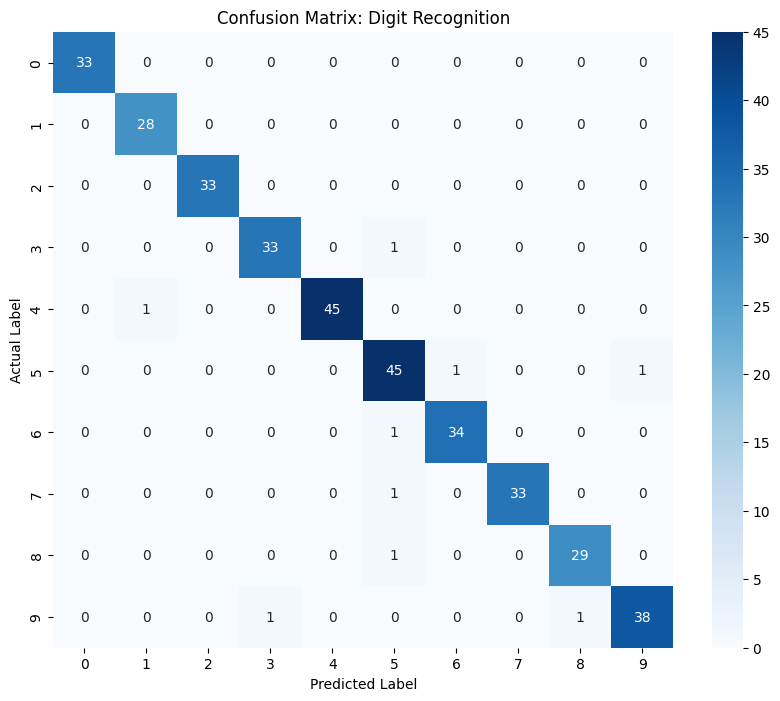

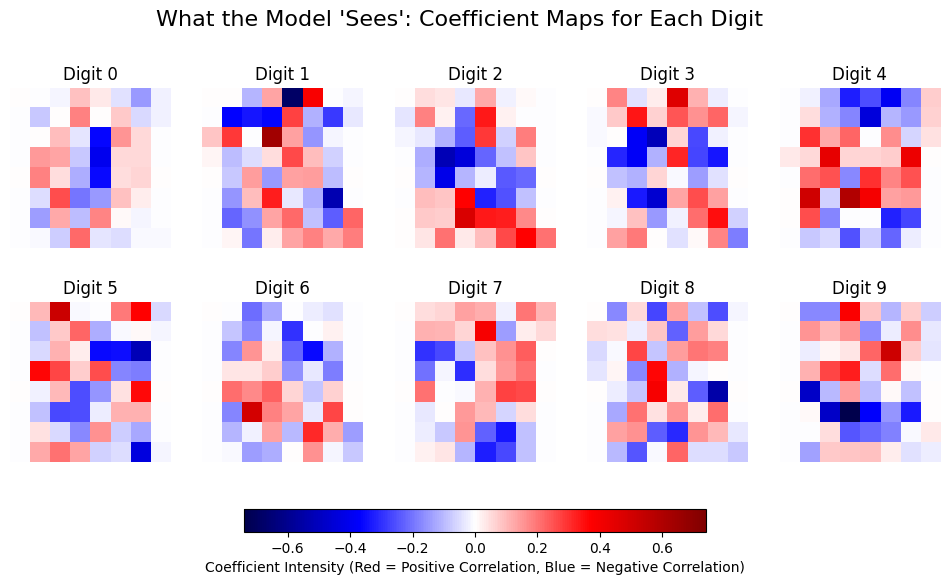

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Load Data (The famous MNIST-lite dataset)
# 8x8 pixel images of handwritten digits (0-9)
digits = load_digits()

X = digits.data   # Shape: (1797, 64) - flattened images
y = digits.target # Labels: 0, 1, 2... 9

print(f"Dataset Shape: {X.shape}")
print(f"Target Classes: {digits.target_names}")

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Model
# We use 'lbfgs' solver which handles Multinomial (multi-class) loss automatically
# max_iter needs to be higher because this is a more complex problem than Iris
print("Training model (this might take a second)...")
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000)
model.fit(X_train, y_train)

# 4. Evaluation
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2%}")

# 5. Visualization 1: Confusion Matrix
# Shows us which numbers get confused (e.g., is 8 often mistaken for 1?)
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix: Digit Recognition')
plt.show()

# 6. Visualization 2: "The Brain of the Model"
# Since we have 64 dimensions, we can't plot a decision boundary line.
# Instead, we plot the COEFFICIENTS reshaped back into 8x8 images.
# This shows what the model "looks for" to identify a number.

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle("What the Model 'Sees': Coefficient Maps for Each Digit", fontsize=16)

# model.coef_ has shape (10, 64) -> 10 classes, 64 pixel weights per class
coefs = model.coef_ 

for i, ax in enumerate(axes.flat):
    # Reshape the 64 weights back into an 8x8 grid
    weight_img = coefs[i].reshape(8, 8)
    
    # Plot: Red = Positive weight (Expects ink), Blue = Negative weight (Expects empty)
    # We use 'seismic' or 'bwr' (blue-white-red) to clearly show pos/neg
    im = ax.imshow(weight_img, cmap='seismic', 
                   vmin=-np.max(np.abs(coefs)), 
                   vmax=np.max(np.abs(coefs)))
    
    ax.set_title(f"Digit {i}")
    ax.axis('off')

# Add a shared colorbar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Coefficient Intensity (Red = Positive Correlation, Blue = Negative Correlation)')

plt.show()

# Synthetic dataset

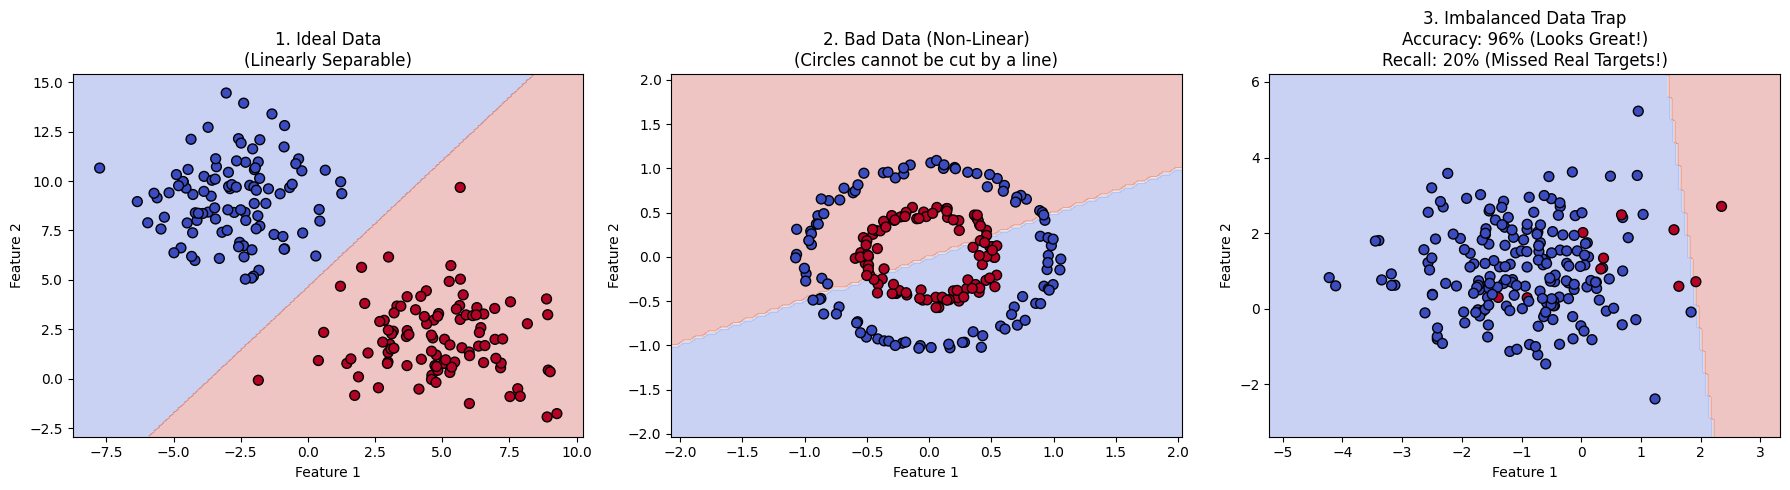


--- 4. Demonstrating Multicollinearity (The Redundancy Trap) ---
Normal Model Coefficient (Salary USD): [0.08291908]
Messy Model Coefficients (USD, EUR):   [0.0511527  0.04347974]

LESSON: In the 'Messy' model, the coefficients are tiny or weirdly split.
The model doesn't know which column to give credit to, so it splits the credit.
This makes 'Interpreting' the feature importance impossible.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

# Setup the figure for 3 visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Helper function to draw the decision boundary (The "Line")
def plot_decision_boundary(X, y, model, ax, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    
    # Predict across the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contour and scatter
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=50)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# ==========================================
# 1. THE GOOD DATA (Linear Separability)
# ==========================================
# Distinct clusters that can be separated by a straight line
X_good, y_good = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=2.0)

model_good = LogisticRegression()
model_good.fit(X_good, y_good)

plot_decision_boundary(X_good, y_good, model_good, axes[0], "1. Ideal Data\n(Linearly Separable)")

# ==========================================
# 2. THE BAD DATA (Non-Linearity)
# ==========================================
# Concentric circles (The "Bullseye" problem)
# A straight line cannot separate the inner circle from the outer ring
X_bad, y_bad = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=42)

model_bad = LogisticRegression()
model_bad.fit(X_bad, y_bad)

plot_decision_boundary(X_bad, y_bad, model_bad, axes[1], "2. Bad Data (Non-Linear)\n(Circles cannot be cut by a line)")

# ==========================================
# 3. THE TRAP (Imbalanced Classes)
# ==========================================
# 98% Class 0, 2% Class 1
X_imb, y_imb = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                                   n_clusters_per_class=1, weights=[0.95, 0.05], 
                                   random_state=42)

model_imb = LogisticRegression()
model_imb.fit(X_imb, y_imb)
pred_imb = model_imb.predict(X_imb)

# Metrics
acc = accuracy_score(y_imb, pred_imb)
rec = recall_score(y_imb, pred_imb)

title_imb = f"3. Imbalanced Data Trap\nAccuracy: {acc:.0%} (Looks Great!)\nRecall: {rec:.0%} (Missed Real Targets!)"
plot_decision_boundary(X_imb, y_imb, model_imb, axes[2], title_imb)

plt.tight_layout()
plt.show()

# ==========================================
# 4. DEMONSTRATING MULTICOLLINEARITY (Console Output)
# ==========================================
print("\n--- 4. Demonstrating Multicollinearity (The Redundancy Trap) ---")

# Create simple data: Salary in USD vs. Loan Approval
np.random.seed(42)
n_samples = 100
salary_usd = np.random.normal(50000, 10000, n_samples)
loan_approved = (salary_usd > 50000).astype(int) # Simple rule

# Reshape for sklearn
X_clean = salary_usd.reshape(-1, 1)

# Train clean model
model_clean = LogisticRegression()
model_clean.fit(X_clean, loan_approved)
print(f"Normal Model Coefficient (Salary USD): {model_clean.coef_[0]}")

# NOW ADD DUPLICATE DATA: Salary in EUR (Calculated perfectly from USD)
# This creates perfect multicollinearity
salary_eur = salary_usd * 0.85 
X_messy = np.column_stack((salary_usd, salary_eur))

# Train messy model
model_messy = LogisticRegression()
model_messy.fit(X_messy, loan_approved)

print(f"Messy Model Coefficients (USD, EUR):   {model_messy.coef_[0]}")
print("\nLESSON: In the 'Messy' model, the coefficients are tiny or weirdly split.")
print("The model doesn't know which column to give credit to, so it splits the credit.")
print("This makes 'Interpreting' the feature importance impossible.")

# LogisticRegression related synthetic data

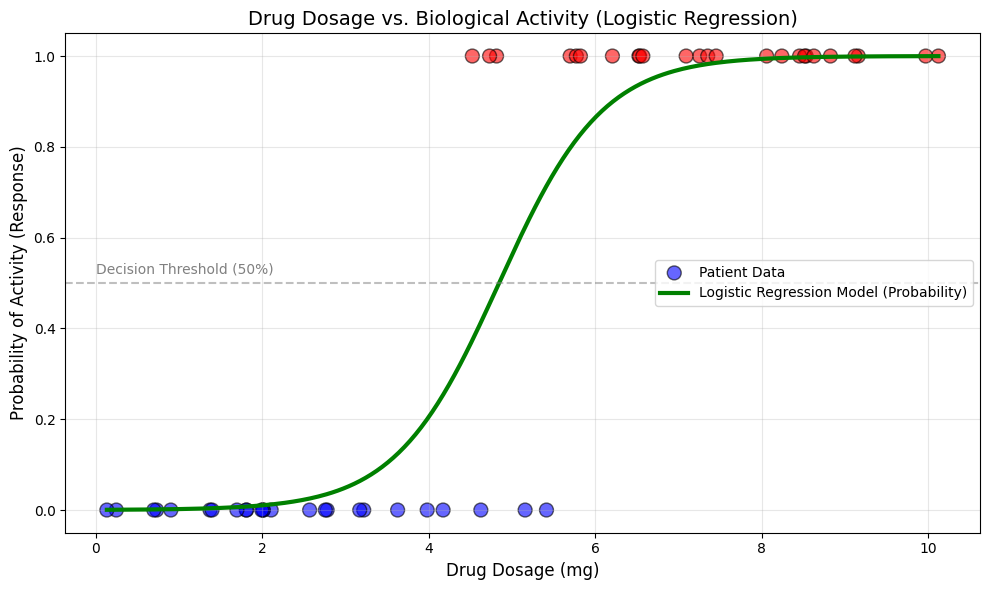

Model Logic: The drug becomes effective (>50% chance) at 4.84 mg.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.special import expit  # This is the sigmoid function

# 1. Generate Synthetic Data (Simulating a Clinical Trial)
np.random.seed(42)
n_patients = 50

# X: Drug Dosage in milligrams (0mg to 10mg)
# We add some jitter/randomness to spread them out
dosages = np.linspace(0, 10, n_patients) + np.random.normal(0, 0.5, n_patients)
dosages = dosages.reshape(-1, 1) # Reshape for sklearn

# y: Biological Activity (0 = No Effect, 1 = Effective)
# We define a "theoretical" threshold at 5mg where the drug starts working
# If (Dosage * Slope + Intercept) > random threshold, outcome is 1
# This math simulates real biological variability
probabilities = expit(dosages * 1.5 - 7.5).ravel() 
outcomes = np.random.binomial(1, probabilities)

# 2. Train Logistic Regression Model
model = LogisticRegression()
model.fit(dosages, outcomes)

# 3. Create the Smooth Curve (The Prediction Line)
# We create a range of dosages from min to max to draw a smooth line
X_test_range = np.linspace(dosages.min(), dosages.max(), 300).reshape(-1, 1)
# predict_proba gives us the probability (The S-Curve)
y_prob_curve = model.predict_proba(X_test_range)[:, 1]

# 4. Plotting
plt.figure(figsize=(10, 6))

# A. Plot the actual patients (Data Points)
# Points at y=0 are failures, points at y=1 are successes
plt.scatter(dosages, outcomes, c=outcomes, cmap='bwr', edgecolor='k', s=100, label='Patient Data', alpha=0.6)

# B. Plot the Logistic Regression Curve (The Model)
plt.plot(X_test_range, y_prob_curve, color='green', linewidth=3, label='Logistic Regression Model (Probability)')

# C. Add the 50% Decision Boundary Line
# This is the dosage where the model is 50/50 unsure
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.5)
plt.text(0, 0.52, 'Decision Threshold (50%)', color='gray', fontsize=10)

# Labels and Styling
plt.title('Drug Dosage vs. Biological Activity (Logistic Regression)', fontsize=14)
plt.xlabel('Drug Dosage (mg)', fontsize=12)
plt.ylabel('Probability of Activity (Response)', fontsize=12)
plt.legend(loc='center right')
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

# Optional: Print the "Decision Boundary" Dosage
# Mathematically: boundary = -intercept / coefficient
decision_boundary = -model.intercept_[0] / model.coef_[0][0]
print(f"Model Logic: The drug becomes effective (>50% chance) at {decision_boundary:.2f} mg.")

# Breast cancer dataset

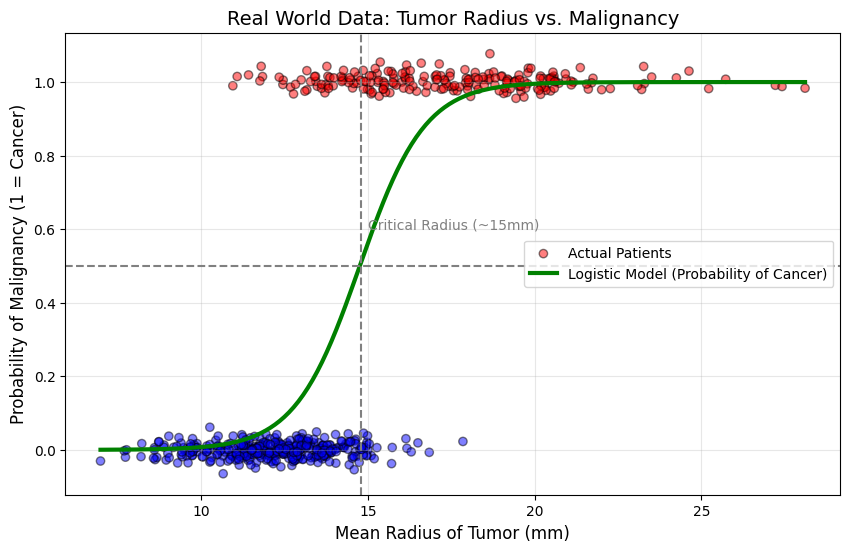

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# 1. Load Real World Data
data = load_breast_cancer()
X = data.data[:, 0].reshape(-1, 1) # Feature: Mean Radius (Column 0)
y = data.target                    # Target: 0 = Malignant, 1 = Benign

# 2. PREPROCESSING TRICK FOR TEACHING
# In this specific sklearn dataset, 0 is Malignant and 1 is Benign.
# This means the curve would go DOWN (larger tumor = less likely to be benign).
# To make it look like the "Drug Activity" curve (where "More" = "Risk"),
# we flip the labels so 1 = Malignant and 0 = Benign.
y = 1 - y 

# 3. Train the Model
model = LogisticRegression()
model.fit(X, y)

# 4. Generate the Curve
# Create a smooth range of Tumor Radii from min to max
X_test_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob_curve = model.predict_proba(X_test_range)[:, 1]

# 5. Plotting
plt.figure(figsize=(10, 6))

# Plot the actual patient data (Jittered slightly so they don't overlap)
# We add random noise to the y-axis just for visual separation
jitter = np.random.normal(0, 0.02, size=len(y))
plt.scatter(X, y + jitter, c=y, cmap='bwr', edgecolor='k', alpha=0.5, label='Actual Patients')

# Plot the Logistic Model (S-Curve)
plt.plot(X_test_range, y_prob_curve, color='green', linewidth=3, label='Logistic Model (Probability of Cancer)')

# Add the 50% Threshold line
plt.axhline(0.5, color='gray', linestyle='--')
plt.axvline(14.8, color='gray', linestyle='--') # Approx visual threshold
plt.text(15, 0.6, 'Critical Radius (~15mm)', color='gray')

plt.title('Real World Data: Tumor Radius vs. Malignancy', fontsize=14)
plt.xlabel('Mean Radius of Tumor (mm)', fontsize=12)
plt.ylabel('Probability of Malignancy (1 = Cancer)', fontsize=12)
plt.legend(loc='center right')
plt.grid(True, alpha=0.3)

plt.show()